In [1]:
import pandas as pd
import numpy as np
from math import factorial
from itertools import combinations_with_replacement
%matplotlib inline
import matplotlib.pyplot as plt


# Part A: Model Code

## 1. Implement the following function that generates the polynomial and interaction features for a given degree of the polynomial.

In [213]:
def polynomialFeatures(X, degree):

    list_Of_Row = []

    for i, x in enumerate(X): # for each row
        
        y = []
        
        for j in range(degree+1): # create power
            
            tuples = list( combinations_with_replacement(X[i], j) ) # Create combinations
        
            for index, t in enumerate(tuples) : # compute the product of elements each tuple
#                 print(t)
                y.append(np.prod(np.array(t)) )
    
        list_Of_Row.append(np.array(y))


    polynomialFeatures = np.zeros( ( X.shape[0], len(list_Of_Row[0]) ) ) 
    
    for e, row in enumerate(list_Of_Row):
        polynomialFeatures[e:] =  row

    
        
    return np.delete(polynomialFeatures, np.s_[0:1], axis=1) # remove the first column
    

In [452]:
kkk = polynomialFeatures(np.arange(6).reshape(3,2), 2)
kkk


array([[ 0.,  1.,  0.,  0.,  1.],
       [ 2.,  3.,  4.,  6.,  9.],
       [ 4.,  5., 16., 20., 25.]])

## 2. Implement the following function to calculate and return the mean squared error (mse) of two vectors

In [3]:
def mse(y_true, y_pred):
    delta = y_true - y_pred
    return delta.dot(delta) / y_true.shape[0]

## 3. Compute the function to compute training and validation errors

In [395]:
import math

def learning_curve(model, X, y, cv, train_size, learning_rate, epochs, tol, regularizer, lambd, **kwargs):
    
    # use train_size to generate all possible data set for cross validation
    # start with train_size and increment it by train_size
    train_sizes = []
    folders = []
    temp = train_size
    while  temp < X.shape[0] + 1:
#         train_sizes.append(temp)
        train = X[0:temp]
        test = y[0:temp]
        
        temp += train_size
        folders.append( (train, test))
        
    
    mse_training_folds = []
    mse_validation_folds= []
    sqrt_mse_train_scores = []
    sqrt_mse_validation_scores = []
    
    for fold in folders:
        one_fold = int(fold[0].shape[0]/cv) # size of one fold
        start2 = 0
        end2 = one_fold
        while end2 < fold[0].shape[0]+1:#i < cv:
         
            # create training folds
            xtrain = np.delete(fold[0], np.arange(start2, end2), axis=0) 
            ytrain = np.delete(fold[1], np.arange(start2, end2), axis=0)

            # fit the LinearRegression for training folds
            line_reg = model()
            line_reg.fit( xtrain, ytrain, learning_rate, epochs, tol, regularizer,lambd, )
            y_training_predicted = line_reg.predict(xtrain)
            mse_training_folds.append( mse(ytrain, y_training_predicted))

            y_validation_predicted = line_reg.predict( fold[0][ start2:end2])
            
            mse_validation_folds.append( mse( fold[1][ start2:end2], y_validation_predicted ) )

            start2 = end2
            end2 +=   one_fold 
            
#         print("train_sizes ", (train_sizes))
        sqrt_mse_train_scores.append( math.sqrt( np.mean(mse_training_folds) )  )
        sqrt_mse_validation_scores.append(   math.sqrt( np.mean(mse_validation_folds) ) ) 
#         print("sqrt_mse_train_scores ", len(sqrt_mse_train_scores))
        mse_training_folds = []
        mse_validation_folds = []
                  
        train_sizes.append(xtrain.shape[0])
        

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, sqrt_mse_train_scores, "r-+", linewidth=3, label="Training Score")
    plt.plot(train_sizes, sqrt_mse_validation_scores, "b-", linewidth=2, label="Cross-validation Score")
    plt.legend(loc="best", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel(" RMSE", fontsize=14) 
    plt.title("Learning Curve")
    plt.show()
        
    return  sqrt_mse_train_scores, sqrt_mse_validation_scores
        
    
    


## 5. Implemente Linear_Regressionmodel class.

In [97]:
class LinearRegression(object):
    
    def __init__(self):
        
        self.theta_hat =  None

    def fit(self, X, y, learning_rate, epochs, tol, regularizer,lambd,**kwargs):
        
        self.theta_hat = np.zeros( X.shape[1] )
        
        # Compute l2
        def L2():
            return (learning_rate/X.shape[0]) * lambd *  self.theta_hat
        
        # Compute l1
        def L1():
            return (learning_rate/X.shape[0]) * lambd * np.sign(self.theta_hat)
        
        
        norms = {"l2": L2, "l1": L1}
        
        # Compute theta_hat
        def compute_theta_hat():
            
            if regularizer is None:
                self.theta_hat = self.theta_hat - (learning_rate/X.shape[0]) * X.T.dot( (X.dot(self.theta_hat) - y) ) 
            else:
                self.theta_hat = self.theta_hat - (learning_rate/X.shape[0]) * X.T.dot( (X.dot(self.theta_hat) - y) ) - norms[ regularizer ]()        
                  
    
       # minimize theta_ha
        if tol is None:
            
            while epochs > 0:
                compute_theta_hat()
                epochs -= 1
        else: 
            compute_theta_hat()
            y_predicted = predict(X)
            mse = mse(y, y_predicted)
            previous_mse = 0
            
            while mse < previous_mse - tol:
                previous_mse = mse
                compute_theta_hat()
                y_predicted = predict(X)
                mse = mse(y, y_predicted)
                
    
    # prediction function       
    def predict(self, X):
        return X.dot(self.theta_hat)  
        

# Part B Data Processing

### 6. Read file

In [456]:
df = pd.read_csv("C:/Users/pemesie/Documents/UNL/UNL/CSCE 478 Intro Machine Learning/datasets/winequality-red.csv", sep=",")
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### 7. Summarize each of the variables in the dataset

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### 8. Suffle the rows of the data

In [460]:
df_s =  df.sample(frac=1)

### 9. Generate pair plots using the seaborn package

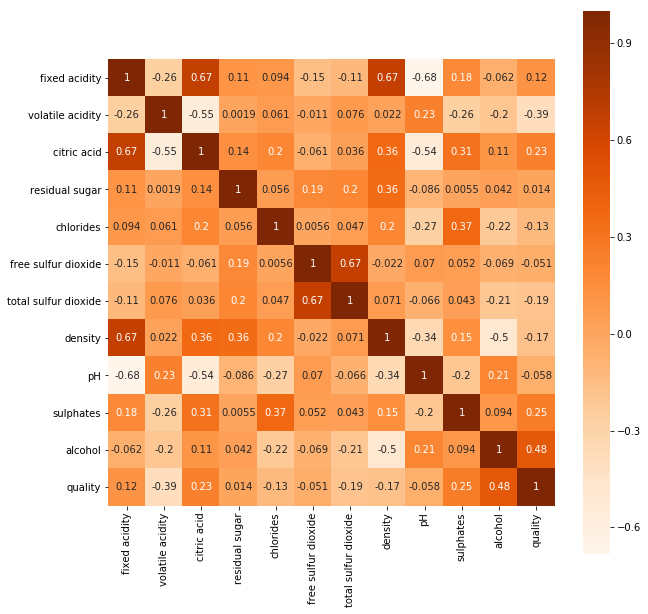

In [9]:
import seaborn as sb

fig = plt.subplots(figsize=(10,10))
sb.heatmap(df_s.corr(), vmax=1, square= True,annot=True, cmap='Oranges')

In [8]:
# correlation of target with the features
df.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

In [442]:
# df = df.drop(columns = ['volatile acidity', 'total sulfur dioxide', 'density', 'chlorides', 'pH','free sulfur dioxide','residual sugar','fixed acidity',     ])

In [457]:
X = df.drop(["quality"], axis=1)
y = df["quality"]

X = np.array(X)
y = np.array(y)

X.shape

(1599, 11)

In [483]:
# Check the rank of the matrix. If full rank, the matrix is vertible, invertible otherwise
from numpy.linalg import matrix_rank
print("Rank of X:", matrix_rank(X.dot(X.T)), X.dot(X.T).shape)
print("det:", np.linalg.det(X.dot(X.T)))



Rank of X: 11 (1599, 1599)
det: 0.0


In [10]:
def standardization(X):
    
    mean = np.zeros(X.shape[1])
    sdt = np.zeros(X.shape[1])
    
    for index in range( 0, X.shape[1] ):
        mean[index] = X[:,index].mean()
        sdt[index] = X[:, index].std()
        X[:, index] =  ( X[:, index] - mean[index]  ) / sdt[index]
        
    return X

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


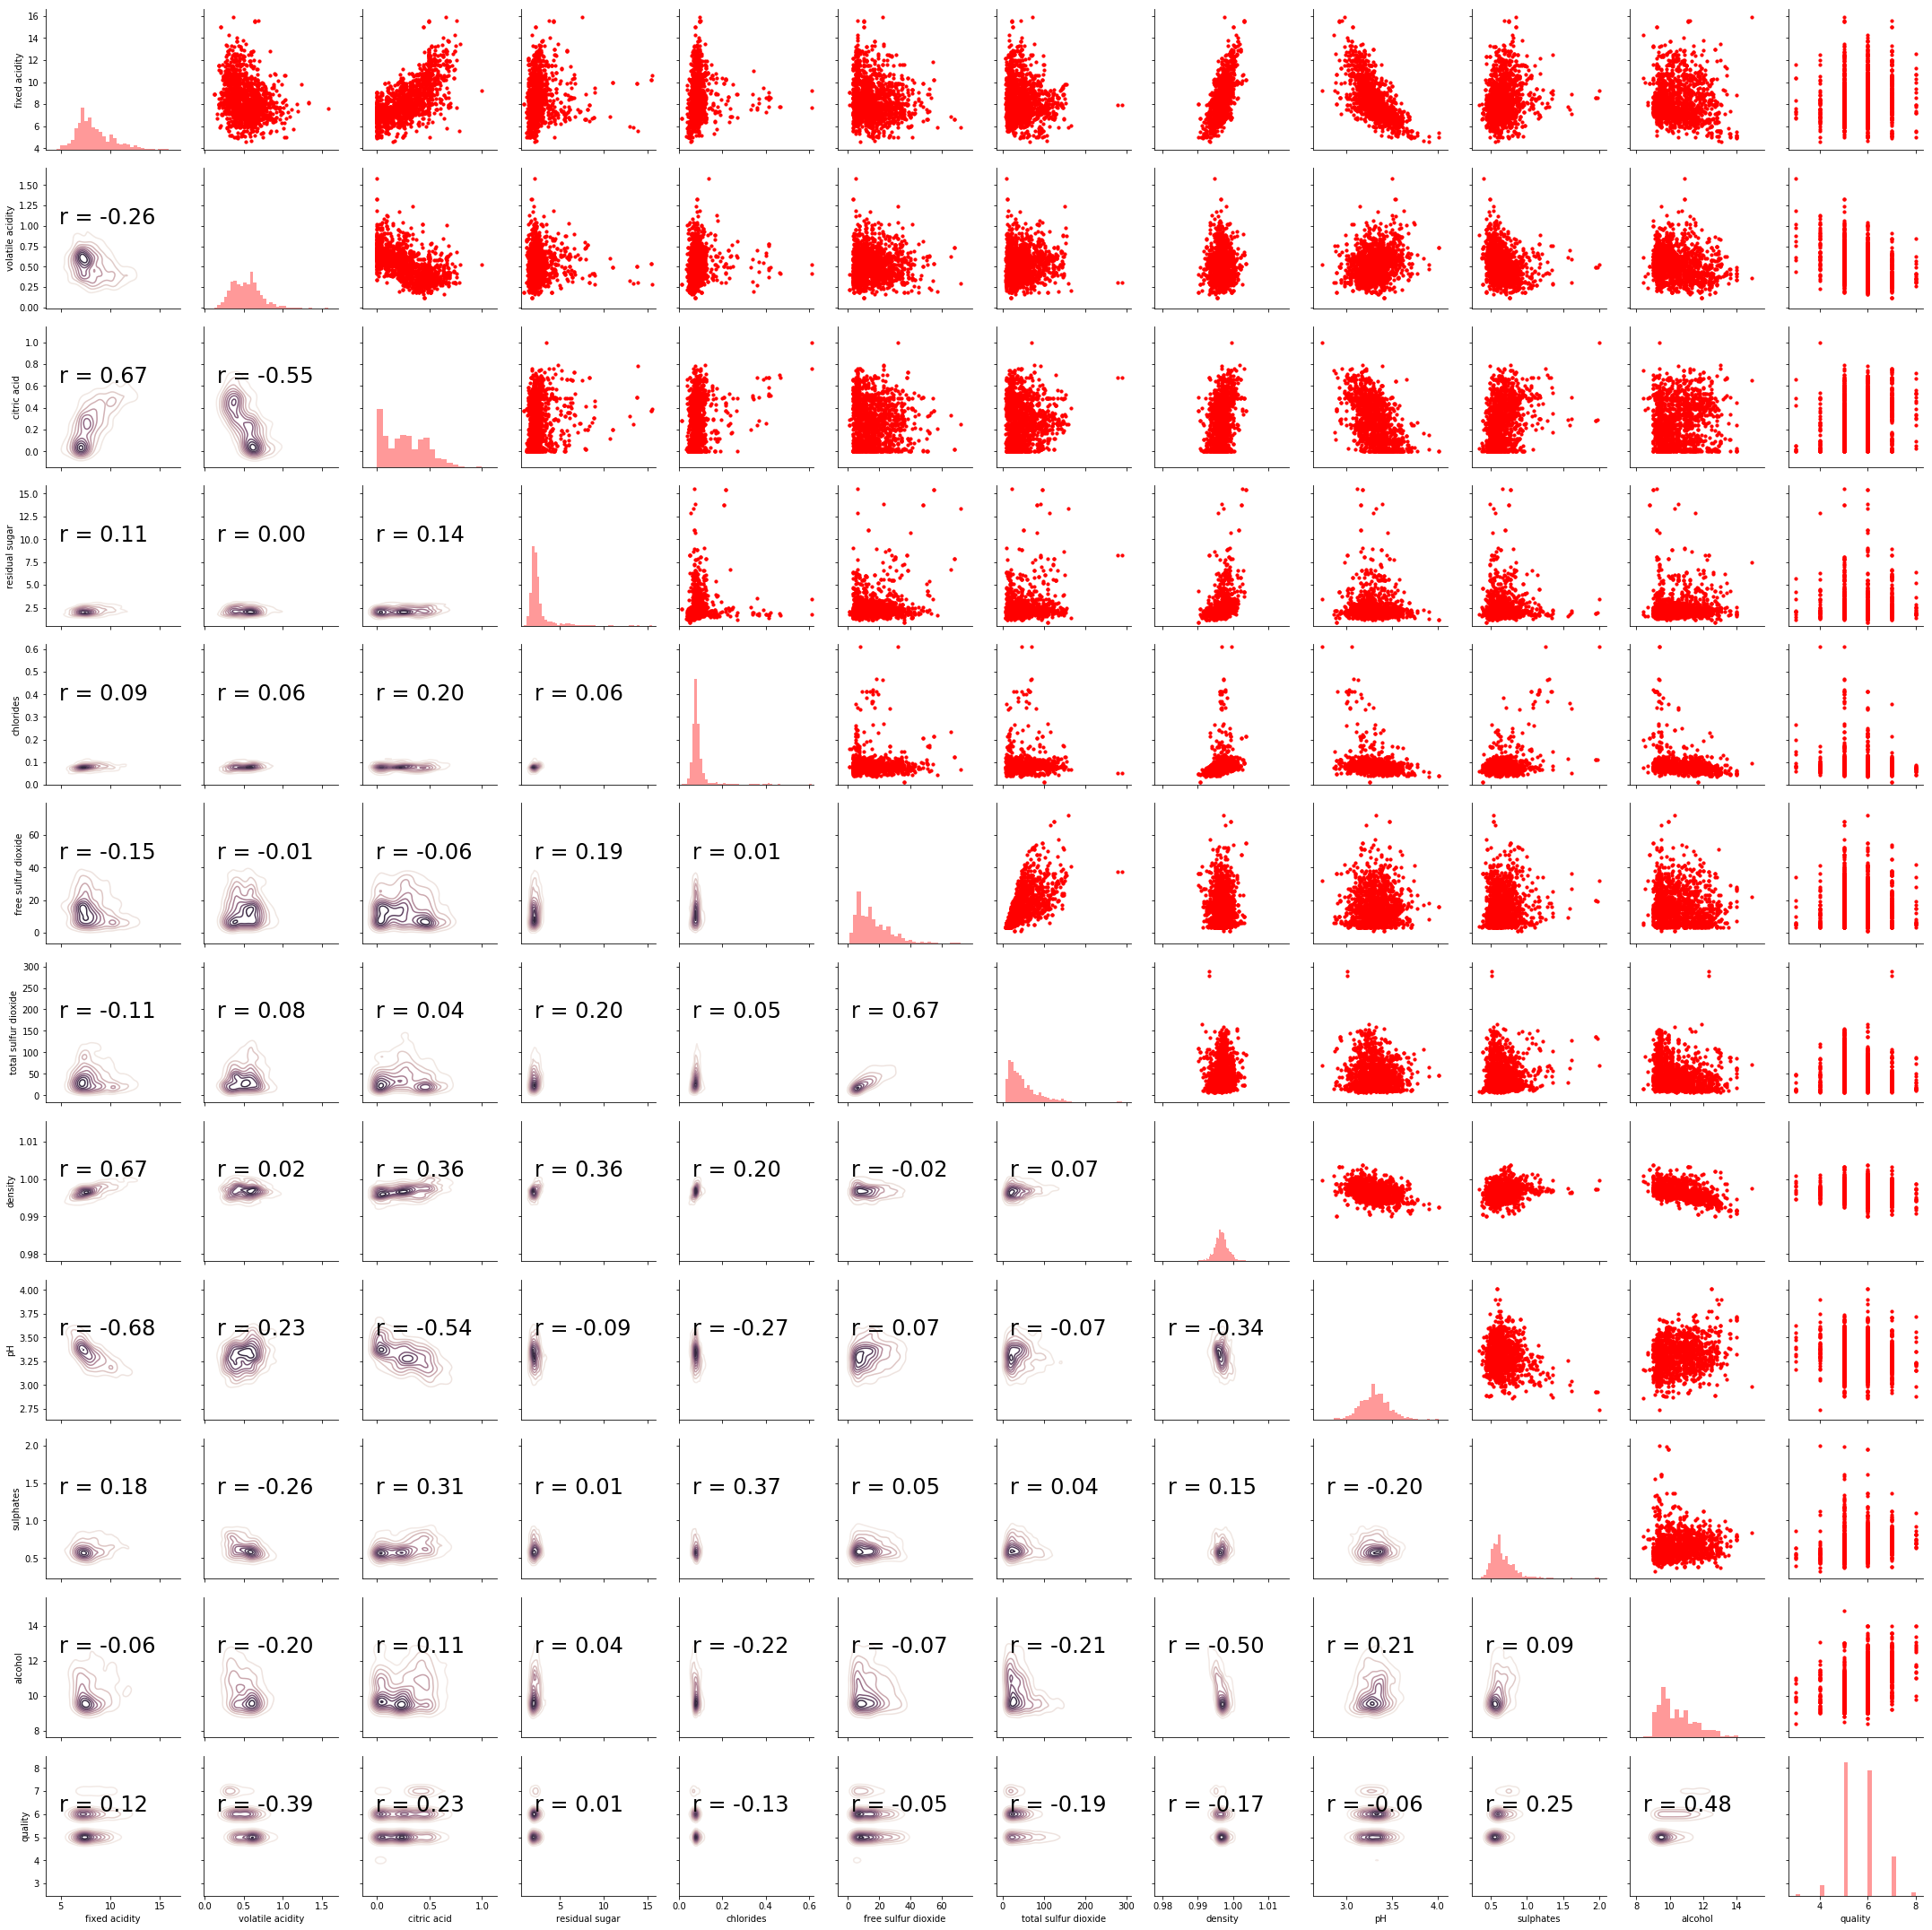

In [21]:
# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from scipy import stats

# Calculate correlation coefficient
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .6), xycoords=ax.transAxes,
               size = 24)
    
cmap = sns.cubehelix_palette(light=1, dark = 0.1,
                             hue = 0.5, as_cmap=True)

sns.set_context(font_scale=2)

# Pair grid set up
g = sns.PairGrid(df)

# Scatter plot on the upper triangle
g.map_upper(plt.scatter, s=10, color = 'red')

# Distribution on the diagonal
g.map_diag(sns.distplot, kde=False, color = 'red')

# Density Plot and Correlation coefficients on the lower triangle
g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc);

### 10.   Split data into train and test set

In [11]:
# split data and return X_train, X_test, y_train, y_test

def split_data(X, y, split_percentage):
    
    test_data_size = int( X.shape[0] * split_percentage )
    train_data_size = X.shape[0] - test_data_size
    
    X_train = X[0:train_data_size, : ]
    y_train = y[0:train_data_size ]
    X_test = X[train_data_size+1 : X.shape[0], :]
    y_test = y[train_data_size+1:y.shape[0]]
    
    return  X_train, X_test , y_train , y_test

In [458]:
X = standardization(X)

In [459]:
X_train_no_bias, X_test_no_bias , y_train , y_test =  split_data(X, y, 0.2)

X_train = np.c_[np.ones((X_train_no_bias.shape[0],1)),X_train_no_bias]
X_test = np.c_[np.ones((X_test_no_bias.shape[0],1)),X_test_no_bias]


In [460]:
print(X.shape)
print(X_train.shape)
print(y_train.shape)
print(y_test.shape)

(1599, 11)
(1280, 12)
(1280,)
(318,)


# Part C Model Evaluation

### 11. Evaluation of an estimator performance via cross-validation: Implement the k-fold cross-validation function. 

In [390]:
def kFold(folds, data, labels, model, error_function, **kwargs):
    # partition data and labels
    one_fold_size = int(data.shape[0]/folds) # size of one fold
    partitions = []
    first_index = 0
    last_index = one_fold_size
    for i in range(folds):
        x = data[first_index:last_index]
        y = labels[first_index:last_index]
        partitions.append((x,y))
        first_index = last_index
        last_index += one_fold_size
        
    # cross validation on partions
    
    expected_labels = []
    predicted_labels = []
    average_error = []
    mean_sqrt_error= []
    average_error_1 = []
    for fold in partitions:
        one_fold_size = int(partitions[0][0].shape[0]/folds)
        start2 = 0
        end2 = one_fold_size
        while end2 < fold[0].shape[0]+1:
            # create training folds
            xtrain = np.delete(fold[0], np.arange(start2, end2), axis=0) 
            ytrain = np.delete(fold[1], np.arange(start2, end2), axis=0)
            # fit the LinearRegression for training folds
            line_reg = model()
            line_reg.fit( xtrain, ytrain, kwargs["learning_rate"], kwargs["epochs"], kwargs["tol"], kwargs["regularizer"], kwargs["lambd"] )
            labels_predicted = line_reg.predict(xtrain)
            
            y_test_predicted = line_reg.predict(fold[0][start2: end2]) #!!!!!!!
            
            # Store expected labels and predicted labels for current partition
            expected_labels.append(fold[1][start2: end2])
            predicted_labels.append(y_test_predicted)
#             predicted_labels.append(labels_predicted)
            # mean square error of A partition
            mean_sqrt_error.append( mse(fold[1][start2: end2], y_test_predicted) )
#             mean_sqrt_error.append( mse(ytrain, labels_predicted) )

            start2 = end2
            end2 +=   one_fold_size
        
        # Calculate the average error
        average_error_1.append( np.mean(mean_sqrt_error) )

    # mean square error of partitionS
    average_error.append( np.mean(average_error_1))
        
    return  {'expected_labels': expected_labels, 'predicted_labels': predicted_labels, 'average_error': average_error}
        


### 12. Model selection via Hyper-parameter tuning: Use your kFold function to evaluate the performance of your model 

In [503]:
# To determine the best model
def find_min_average_error(previous_average_error):
    for i in results:
        for j in i['average_error']:
            if j < previous_average_error:
                previous_average_error = j
    return previous_average_error

In [504]:
lambd = [1.0, 0, 0.1, 0.01, 0.001, 0.0001]
learning_rate = [1.0, 0.01, 0.001, 0.001, 0.1]
regularizer = ["l1", "l2"]
folds = 5
kwargs= {}
best_model = {}
results = []
min_average_error = float("inf")
r = []

for lamb in lambd:
    for rate in learning_rate:
        for regularize in regularizer:
            kwargs = {"lambd": lamb, "learning_rate": rate, "regularizer": regularize, "epochs": 10, "tol": None}
            # store the returning dictionary(ecpected_labels, predicted_labels, average_error) in result
            results.append( kFold(folds, X_train, y_train, LinearRegression, mse, **kwargs)   ) 
            r.append( {"lambd": lamb, "learning_rate": rate, "regularizer": regularize} )
            # Determine the best model
            current_average_error = find_min_average_error(min_average_error)
            if current_average_error < min_average_error:
                min_average_error = current_average_error
                best_model = {"lambd": lamb, "learning_rate": rate, "regularizer": regularize}

In [506]:
r

[{'lambd': 1.0, 'learning_rate': 1.0, 'regularizer': 'l1'},
 {'lambd': 1.0, 'learning_rate': 1.0, 'regularizer': 'l2'},
 {'lambd': 1.0, 'learning_rate': 0.01, 'regularizer': 'l1'},
 {'lambd': 1.0, 'learning_rate': 0.01, 'regularizer': 'l2'},
 {'lambd': 1.0, 'learning_rate': 0.001, 'regularizer': 'l1'},
 {'lambd': 1.0, 'learning_rate': 0.001, 'regularizer': 'l2'},
 {'lambd': 1.0, 'learning_rate': 0.001, 'regularizer': 'l1'},
 {'lambd': 1.0, 'learning_rate': 0.001, 'regularizer': 'l2'},
 {'lambd': 1.0, 'learning_rate': 0.1, 'regularizer': 'l1'},
 {'lambd': 1.0, 'learning_rate': 0.1, 'regularizer': 'l2'},
 {'lambd': 0, 'learning_rate': 1.0, 'regularizer': 'l1'},
 {'lambd': 0, 'learning_rate': 1.0, 'regularizer': 'l2'},
 {'lambd': 0, 'learning_rate': 0.01, 'regularizer': 'l1'},
 {'lambd': 0, 'learning_rate': 0.01, 'regularizer': 'l2'},
 {'lambd': 0, 'learning_rate': 0.001, 'regularizer': 'l1'},
 {'lambd': 0, 'learning_rate': 0.001, 'regularizer': 'l2'},
 {'lambd': 0, 'learning_rate': 0.001

In [462]:
best_model

{'lambd': 0.1, 'learning_rate': 0.1, 'regularizer': 'l1'}

### 13. Evaluate your model on the test data and report the mean squared error

In [463]:
lin_reg_test = LinearRegression()
lin_reg_test.fit( X_test, y_test, 0.1, 250, None, "l1", 1)
y_test_predicted = lin_reg_test.predict(X_test)

MSE = mse(y_test, y_test_predicted)
print("Mean Squared Error ", MSE)


Mean Squared Error  0.382185212801659


### 14. Using the best model plot the learning curve

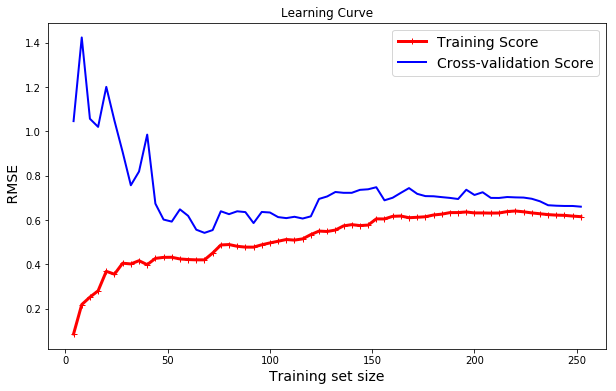

In [486]:
# Use the root mse value obtained from hte "learning curve" function to plot this curve

sqrt_mse_train_scores, sqrt_mse_validation_scores = learning_curve(LinearRegression, X_test, y_test, 5, 5, 0.1, 1000, None, "l1", 0.1)

In [85]:
# sqrt_mse_validation_scores

In [126]:
# sqrt_mse_train_scores

### 15. Determine the best model hyper-parameter for the training data matrix with poynomial degree 3 and plot the learning curve using rmse values obtained from the "learning_curve"

In [487]:
# print(X_train_no_bias, "\n")
X_train_poly = polynomialFeatures( X_train_no_bias, 3)
X_train_poly_standardized =   standardization(X_train_poly)
X_train_poly_standardized = np.c_[np.ones((X_train_poly_standardized.shape[0],1)),X_train_poly]

X_test_poly = polynomialFeatures( X_test_no_bias, 3)
X_test_poly_standardized =   standardization(X_test_poly)
X_test_poly_standardized = np.c_[np.ones((X_test_poly_standardized.shape[0],1)),X_test_poly]


print("X_train_poly_standardized ", X_train_poly_standardized.shape)

X_train_poly_standardized  (1280, 364)


In [452]:

best_model2 = {}
min_average_error = float("inf")


for lamb in lambd:
    for rate in learning_rate:
        for regularize in regularizer:
            kwargs = {"lambd": lamb, "learning_rate": rate, "regularizer": regularize, "epochs": 100, "tol": None}
            # store the returning dictionary(ecpected_labels, predicted_labels, average_error) in result
            results.append(  kFold(folds, X_train_poly_standardized, y_train, LinearRegression, mse, **kwargs)   ) 
            # Determine the best model
            current_average_error = find_min_average_error(min_average_error)
            if current_average_error < min_average_error:
                min_average_error = current_average_error
                best_model2 = {"lambd": lamb, "learning_rate": rate, "regularizer": regularize}           

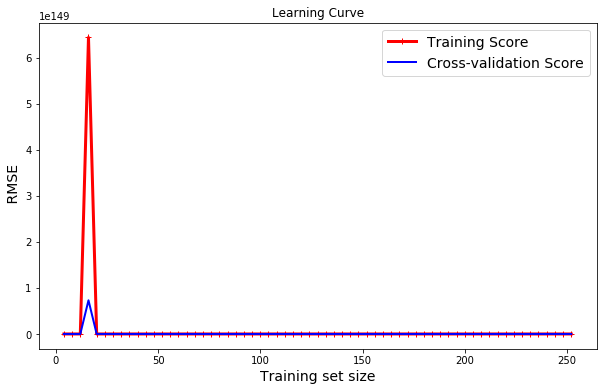

In [489]:

sqrt_mse_train_poly_scores, sqrt_mse_validation_poly_scores = learning_curve(LinearRegression, X_test_poly_standardized, y_test, 5, 5, 0.1, 100, None, "l1", 0.1)
